[0.1845987386105169, 0.008482827350329014, -0.04246876776962438, -0.028257246198992725, 0.001981313124475359, 0.0]
[0.06223502898564215, 0.016886365684485927, -0.004405941358547022, -0.004119591264791084, 0.0021581103104438004, 0.0]
[0.016627727743122322, -0.00564058649914706, -0.012599800768663183, -0.007132428443414746, 0.0027586680862622392, 0.0]
[0.022688518262943047, -0.005732925083263396, -0.011282600914543334, -0.00983236686320435, 0.0024149765779426513, 0.0]
[-0.09032695386622391, -0.09298157317362432, -0.06206549454459198, -0.032707690939278944, 0.001657969639468737, 0.0]
[0.12059129487483877, 0.0729146484934956, 0.005732370079110538, -0.015734646298469768, 0.0031083133242546523, 0.0]
[[ 0.18459874  0.00848283 -0.04246877 -0.02825725  0.00198131  0.        ]
 [ 0.06223503  0.01688637 -0.00440594 -0.00411959  0.00215811  0.        ]
 [ 0.01662773 -0.00564059 -0.0125998  -0.00713243  0.00275867  0.        ]
 [ 0.02268852 -0.00573293 -0.0112826  -0.00983237  0.00241498  0.       

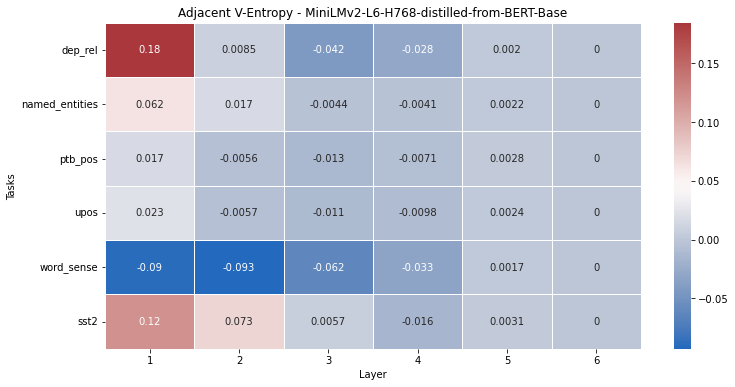

[0.24062578270964774, 0.041071948363163746, -0.05493257273699603, -0.09463044258211262, -0.04774518273943307, 0.0]
[0.0719097036534348, 0.03285061478669682, 0.0016201957493366115, -0.012765121738850804, -0.004181441192697172, 0.0]
[0.021931167350092068, -0.009062680340533702, -0.02270422534168448, -0.02341253790853212, -0.010477388364449919, 0.0]
[0.02699488890600038, -0.010651898240130242, -0.027659028619249404, -0.028405524724316955, -0.012776280639909543, 0.0]
[-0.11644879625237192, -0.1250269805502846, -0.11309898304079691, -0.06875681925996191, -0.027748606499051087, 0.0]
[0.08979335399942667, 0.06180635504766341, 0.04780235640499575, -0.008237716254838046, -0.016440750262059156, 0.0]
[[ 0.24062578  0.04107195 -0.05493257 -0.09463044 -0.04774518  0.        ]
 [ 0.0719097   0.03285061  0.0016202  -0.01276512 -0.00418144  0.        ]
 [ 0.02193117 -0.00906268 -0.02270423 -0.02341254 -0.01047739  0.        ]
 [ 0.02699489 -0.0106519  -0.02765903 -0.02840552 -0.01277628  0.        ]
 

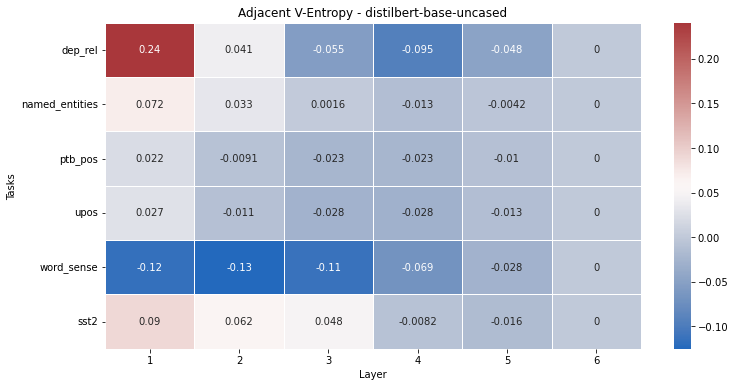

[-0.08227716890958825, -0.048992335368660545, -0.0341542758793425, -0.02782278945872041, -0.021594536094338146, -0.030948127927757252, -0.025232443611058475, -0.022793985743684297, -0.015851985797839196, -0.010950107971622769, -0.002909352914895358, 0.0]
[-0.07564867590912783, -0.04024185305028294, -0.011761746144837604, -0.009860766530827791, -0.004717623744279864, -0.0074181306862798335, -0.008759790216890995, -0.0064119785884486635, 0.0012385322459451675, 0.024728918032953406, 0.004421198908098889, 0.0]
[-0.18185497109474436, -0.10898449134873145, -0.07116798049064466, -0.054758895812461184, -0.04136662796837354, -0.03883456225799464, -0.026094481939292313, -0.018652393991497762, -0.006094029236955345, -0.0003989703771898334, 0.016825930451382254, 0.0]
[-0.14517227862432647, -0.09245324050255888, -0.06244404683734528, -0.04754992841379868, -0.036829767844087646, -0.03541221720911969, -0.024757635015298707, -0.019584558873304347, -0.013017201842625337, -0.010137359196880746, -0.00386

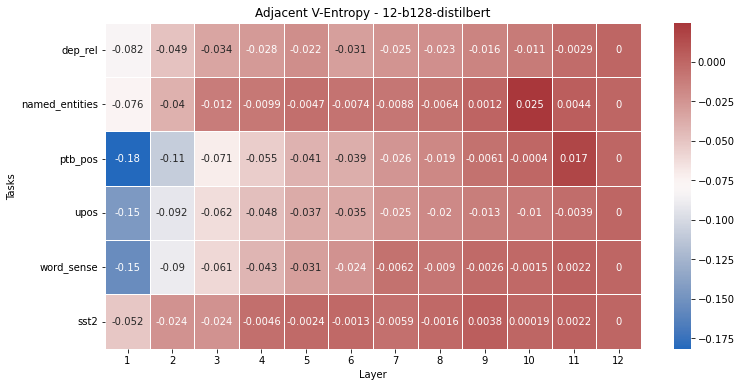

[-0.046992406447158075, -0.051050438655871666, -0.03206147951585381, -0.01915332816603943, -0.009395477376729522, -0.0019324466572796517, 0.009381515528959383, 0.0]
[-0.054487856154044056, -0.02291921928731966, -0.009358404440036883, -0.0005952295327773527, 0.00045243790785520765, 0.0015442649806395314, 0.004985278712328345, 0.0]
[-0.14459788609163038, -0.07907546336411153, -0.048836428068560256, -0.022822544068668682, -0.014576592158349388, -0.005365263091982264, 0.003744313720180914, 0.0]
[-0.09803570552178387, -0.059863220431344955, -0.03472724049578946, -0.024019455200238293, -0.012408169119438872, -0.004492859149494932, 0.002348763572608381, 0.0]
[-0.11671074478178367, -0.06086100569259956, -0.03548431570208721, -0.0213030716318785, -0.011785904886147947, -0.0041074181688804945, 0.00045585270398484923, 0.0]
[-0.018126531478461883, -0.016981632337657704, -0.002843874310134775, -0.001496831211475036, 0.0009997306613747092, 0.0025036313118190767, 0.010187411527021184, 0.0]
[[-0.04699

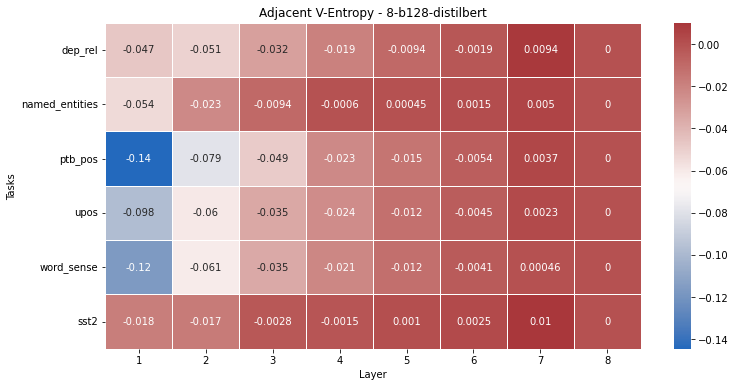

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_data(task,model_name,layer_number):
    #[task+"-"+model_name+"-layer0.yaml.results", task+"-"+model_name+"-layer1.yaml.results", task+"-"+model_name+"-layer2.yaml.results", task+"-"+model_name+"-layer3.yaml.results", task+"-"+model_name+"-layer4.yaml.results",task+"-"+model_name+"-layer5.yaml.results"]
    #[task+"-"+model_name+"-layer0-1.yaml.results", task+"-"+model_name+"-layer1-2.yaml.results", task+"-"+model_name+"-layer2-3.yaml.results", task+"-"+model_name+"-layer3-4.yaml.results", task+"-"+model_name+"-layer4-5.yaml.results", task+"-"+model_name+"-layer5-6.yaml.results"]
    single_layers = ['reports/{}-{}-layer{}.yaml.results/dev.v_entropy'.format(task,model_name,i) for i in range(1,layer_number+1)]
    two_layers = ['reports/{}-{}-layer{}-{}.yaml.results/dev.v_entropy'.format(task,model_name,i-1,i) for i in range(1,layer_number+1)]
    base = []
    cond = []
    for file_path in single_layers:
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                base.append(float(f.read().strip()))
        else:
            print("Path Invalid")

    for folder_name in two_layers:
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                cond.append(float(f.read().strip()))
        else:
            print("Path Invalid")
    r = [(b-c) for b, c in zip(base, cond)]
    print(r)
    return r

tasks=["dep_rel","named_entities","ptb_pos","upos","word_sense","sst2"]
models=["MiniLMv2-L6-H768-distilled-from-BERT-Base","distilbert-base-uncased","12-b128-distilbert","8-b128-distilbert"]
layer_numbers=[6,6,12,8]


for count, model in enumerate(models):
    results = np.empty((0,layer_numbers[count]))
    for task in tasks:
        r = get_data(task, model,layer_numbers[count])
        results = np.append(results, [r], axis=0)
    print(results)
    x_indices = range(1, layer_numbers[count] + 1)
    plt.figure(figsize=(12,6))
    plt.title("Adjacent V-Entropy - "+model)
    ax = sns.heatmap(results, linewidth=0.5,annot=True,cmap="vlag")
    plt.xlabel('Layer')
    plt.ylabel('Tasks')
    ax.set_xticklabels(x_indices)
    ax.set_yticklabels(tasks, rotation='horizontal')
    plt.show()
